Sistema de inferencia difusa de Mamdani
===

* 30 min | Última modificación: Junio 11, 2021 | [YouTube]

In [1]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
!pip install --quiet --upgrade fuzzy_toolbox

## Función de pertenencia y conjuntos difusos

* **Noción de dicotomia**. El conjunto $A$ definido sobre un universo de discurso $X$ tiene una función característica o de pertenencia definida como:

$$
\mu_A(x) = 
\begin{cases}
1, & \text{if } x \in A \\
0, & \text{if } x \notin A \\
\end{cases}
$$

* **Función de pertenencia**: $\mu_A(x) \to \{0,1\}$ indica si el elemento $x$ pertenece al conjunto $A$; es la modelación numérica del concepto.

* **Conjunto difuso**: Se obtiene al relajar la condición anterior, tal que $\mu_A(x) \to [0, 1]$, indicando condición parcial de pertenencia. El $0$ indica absoluta certeza de que no pertenece, y el $1$ absoluta certeza de que si pertenece.

## Problema abordado

En este tutorial se aborda el problema conocido como "Bank Decision Problem", que consiste en decidir si se otorga o no un crédito a una persona a partir de unas variables que la caracterizan.


    IF score IS High
       AND ratio IS Goodr
       AND credit IS Goodc 
    THEN
       decision IS Approve
      
    IF score IS Low
       AND ratio IS Badr
       AND credit IS Badc
    THEN
       decision IS Reject
      

## Variable difusa

Es una variable que esta definida sobre un universo $X$ y tiene varios conjuntos borrosos que representan los conceptos asociados

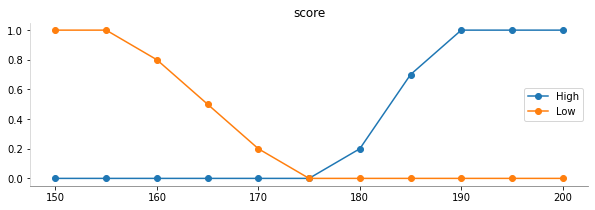

In [3]:
import numpy as np
from fuzzy_toolbox.mamdani import FuzzyVariable

score = FuzzyVariable(
    #
    # Nombre de la variable
    #
    name="score",
    #
    # Universo de valores sobre los que estan definidos los
    # conjuntos borrosos
    #
    universe=np.arange(start=150, stop=201, step=5),
    #
    # Se define cada conjunto borroso y los correspondientes
    # valores de la función de pertenencia para cada punto
    # del universo en que esta definida la variable
    #
    sets={
        "High": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.7, 1.0, 1.0, 1.0],
        "Low": [1.0, 1.0, 0.8, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    },
)

#
# Gráfica de la variable.
#
score.plot()

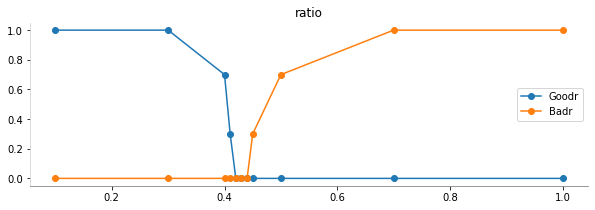

In [4]:
#
# Variable ratio
#
ratio = FuzzyVariable(
    name="ratio",
    universe=[0.1, 0.3, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.5, 0.7, 1.0],
    sets={
        "Goodr": [1, 1, 0.7, 0.3, 0, 0, 0, 0, 0, 0, 0],
        "Badr": [0, 0, 0, 0, 0, 0, 0, 0.3, 0.7, 1.0, 1.0],
    },
)

ratio.plot()

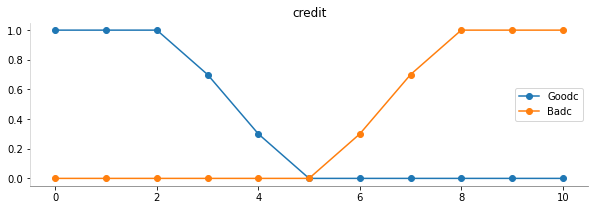

In [5]:
#
# Variable credit
#
credit = FuzzyVariable(
    name="credit",
    universe=list(range(11)),
    sets={
        "Goodc": [1, 1, 1, 0.7, 0.3, 0, 0, 0, 0, 0, 0],
        "Badc": [0, 0, 0, 0, 0, 0, 0.3, 0.7, 1, 1, 1],
    },
)

credit.plot()

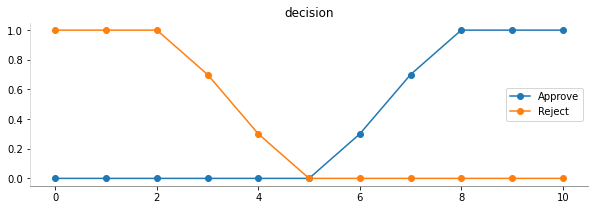

In [6]:
#
# Variable decision
#
decision = FuzzyVariable(
    name="decision",
    universe=list(range(11)),
    sets={
        "Approve": [0, 0, 0, 0, 0, 0, 0.3, 0.7, 1, 1, 1],
        "Reject": [1, 1, 1, 0.7, 0.3, 0, 0, 0, 0, 0, 0],
    },
)

decision.plot()

## Cómputo del valor de pertenencia

Dado un valor $x \in X$ es posible calcular el valor de la función de pertenencia. Por ejemplo, para la variable score:

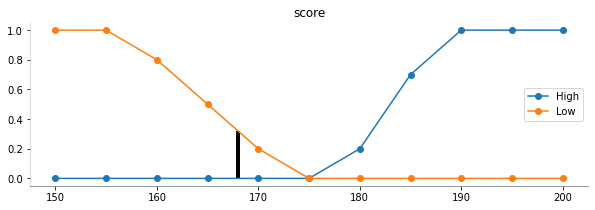

0.32

In [7]:
#
# Pertenencia de score=168 al conjunto Low
#
current_score = 168
membership = score.compute_membership(168, "Low")

score.plot()
plt.gca().vlines(
    x=current_score,
    ymin=0.0,
    ymax=membership,
    color="k",
    linewidth=4,
)
plt.show()

membership

## Reglas difusas

Son reglas que usan variables difusas y conjuntos borrosos para expresar conceptos y reglas heurísticas. Por ejemplo:

*  **IF** score $\in$ "High" **AND** ratio $\in$ "Goodr" **AND** credit $\in$ "Goodc", **THEN** decision $\in$ Approve

*  **IF** score $\in$ "Low" **AND** ratio $\in$ "Badr" **AND** credit $\in$ "Badc", **THEN** decision $\in$ Reject



In [8]:
#
# Regla 1
# -----------------------------------
# IF score IS High
#    AND ratio IS Goodr
#    AND credit IS Goodc
# THEN
#    decision IS Approve
#
from fuzzy_toolbox.mamdani import FuzzyRule

#
# Las reglas están conformadas por tuplas que indican cada
# una de las premisas en el antecedente y el consecuente.
#
rule_1 = FuzzyRule(
    antecedents=[
        (score, "High"),
        (ratio, "Goodr"),
        (credit, "Goodc"),
    ],
    consequent=(decision, "Approve"),
)

rule_1

IF  score IS High
    AND ratio IS Goodr
    AND credit IS Goodc
THEN
    decision IS Approve

In [9]:
#
# Regla 2
# -----------------------------------
# IF score IS Low
#    AND ratio IS Badr
#    AND credit IS Badc
# THEN
#    decision IS Reject
#
rule_2 = FuzzyRule(
    antecedents=[
        (score, "Low"),
        (ratio, "Badr"),
        (credit, "Badc"),
    ],
    consequent=(decision, "Reject"),
)

rule_2

IF  score IS Low
    AND ratio IS Badr
    AND credit IS Badc
THEN
    decision IS Reject

## Implicación

El cálculo de la implicación $A \to B$ consiste en la función de pertenencia del conjunto borroso de salida.

Los pasos son los siguientes:

* Se calcula el valor de la función de pertenencia para cada entrada a la regla.

* Se agregan las entradas.

* Se aplica el operador de implicación.

## Cómputo del valor de la función de pertenencia para cada entrada

In [10]:
#
# Por ejemplo, si
#
#   * score = 185,
#   * ratio = 0.22, y
#   * credit = 2.5
#
# Las pertenencias para la primera regla son:
#
rule_1.compute_memberships(
    score=185,
    ratio=0.22,
    credit=2.5,
)
rule_1.memberships

[0.7, 1.0, 0.85]

In [11]:
#
# Mientras que para la segunda regla son:
#
rule_2.compute_memberships(
    score=185,
    ratio=0.22,
    credit=2.5,
)
rule_2.memberships

[0.0, 0.0, 0.0]

## Agregación de las entradas

Para el operador AND en los antecedentes se suele usar una de las siguientes funciones:

* min.

* prod.

Para el operador OR en los antecedentes:

* max.

* probor.

In [12]:
# 
# Para la regla 1, los valores de las funciones de pertenencia son:
#
rule_1.memberships

[0.7, 1.0, 0.85]

In [13]:
#
# Usando el operador min para el AND
#
rule_1.combine_inputs(and_operator="min", or_operator=None)
rule_1.combined_input

0.7

In [14]:
#
# Usando el operador prod para el AND
#
rule_1.combine_inputs(and_operator="prod", or_operator=None)
rule_1.combined_input

0.595

## Cómputo de la implicación

Operadores de implicación:

* min.

* prod.

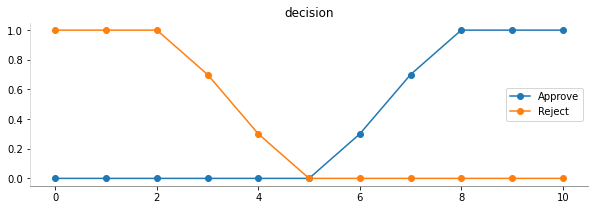

In [15]:
decision.plot()

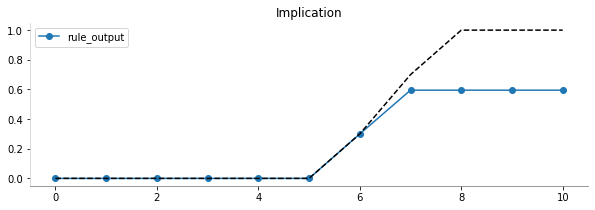

In [16]:
#
# En el operador min, el conjunto difuso resultante es 
# calculado como el mínimo entre el valor de la función de
# pertenencia del conjunto de salida y el valor obtenido al
# agregar las entradas
#
rule_1.compute_implication(implication_operator="min")
rule_1.output.plot()

#
# El efecto visual se debe a que los puntos de la función
# de pertenencia son interpolados para los puntos en que
# está definido el universo de la variable.
# 
plt.plot(decision.universe, decision['Approve'], '--k')
plt.show()

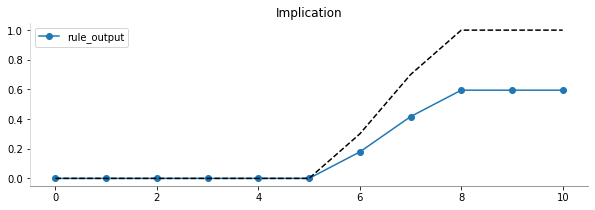

In [17]:
rule_1.compute_implication(implication_operator="prod")
rule_1.output.plot()

#
# Note que esta es la versión escalada de la función de
# pertenencia original
#
plt.plot(decision.universe, decision['Approve'], '--k')
plt.show()

## Regla composicional de inferencia max-min

En esta regla composicional de inferenica se usa el operador min para el cómputo de la agregación de antecedentes y la implicación.

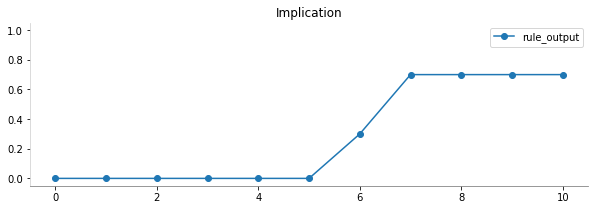

In [18]:
rule_1.combine_inputs(and_operator="min", or_operator=None)
rule_1.compute_implication(implication_operator="min")
rule_1.output.plot()

## Regla composicional de inferencia max-prod

En este caso se usa el operador prod para el cómputo de la agregación de los antecedentes y la implicación.

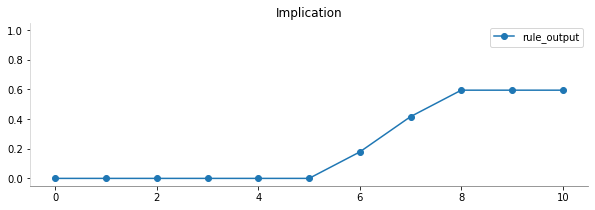

In [19]:
rule_1.combine_inputs(and_operator="prod", or_operator=None)
rule_1.compute_implication(implication_operator="prod")
rule_1.output.plot()

## Sistema de inferencia difusa

Es un sistema de reglas difusas que permite realizar inferencia y obtener resultados. Esta compuesto por los siguientes elementos:

* Entrada.

* Fuzzifier.

* Fuzzy knowledge base.

* Inference engine.

* Defuzzifier. 

## Especificación de un modelo de Mamdani

En un sistema difuso de Mamdani, se deben especificar:

* Las variables difusas.

* El sistema de reglas difusas.

* El operador de agregación de los antecedentes (and_operator).

* El operador para el cómputo de la implicación.

* El operador para el cómputo de la agregación de los conjuntos de salida de las reglas.

* El método para defuzzificar (convertir a un valor crisp representativo) el conjunto borroso.

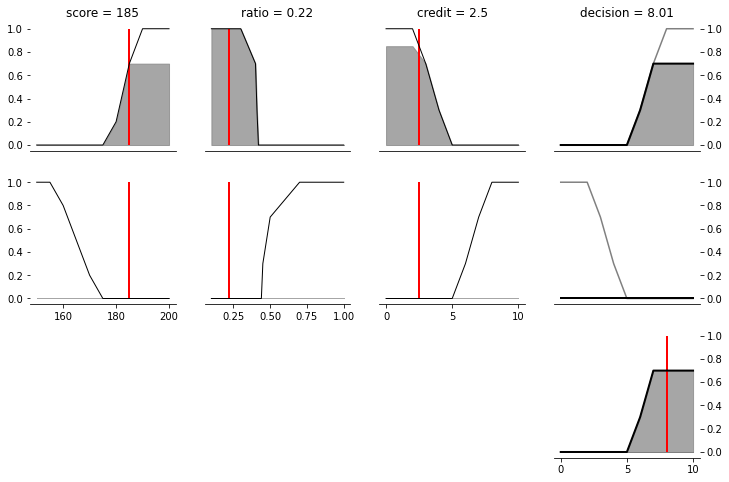

In [20]:
from fuzzy_toolbox.mamdani import Mamdani

#
# Especificación del sistema difuso que usa la regla
# composicional de inferencia max-min
#
mamdani = Mamdani(
    rules=[
        rule_1,
        rule_2,
    ],
    and_operator="min",
    or_operator="max",
    implication_operator="min",
    aggregation_operator="max",
    defuzzification_operator="cog",
)

plt.figure(figsize=(12, 8))

mamdani.plot(
    score=185,
    ratio=0.22,
    credit=2.5,
)

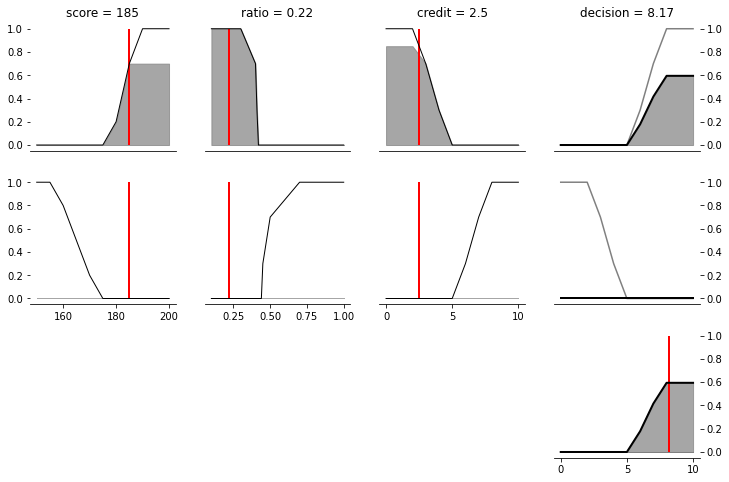

In [21]:
#
# Especificación del sistema difuso que usa la regla
# composicional de inferencia max-prod
#
mamdani = Mamdani(
    rules=[
        rule_1,
        rule_2,
    ],
    and_operator="prod",
    or_operator="max",
    implication_operator="prod",
    aggregation_operator="max",
    defuzzification_operator="cog",
)

plt.figure(figsize=(12, 8))

mamdani.plot(
    score=185,
    ratio=0.22,
    credit=2.5,
)

## Agregación de los conjuntos borrosos de salida.

Consiste en cálcular la agregación de los conjuntos borrosos inferidos en el cálculo de las reglas. Se puede agregar con los siguientes operadores:

* max.

* sum.

* probor.

En los ejemplos anteriores, se usa la función max.

## Concretación (defuzzification)

Consiste en reducir el conjunto borroso a un número crsip que lo represente. Los métodos disponibles son:

* cog: centro de gravedad

* bisection: bisección de las áreas

* mom: media de los máximos.

* lom: máximo de los máximos.

* som: mínimo de los máximos.